## Importing all required libraries

In [2]:
# !pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor  
from sklearn.model_selection import GridSearchCV



from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score


## Loading and examining the dataset

In [5]:
news = pd.read_csv('OnlineNewsPopularity.csv')  #loading the dataset

In [6]:
news.head(10) #view the first 5 rows of the data

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
5   http://mashable.com/2013/01/07/beewi-smart-toys/       731.0   
6  http://mashable.com/2013/01/07/bodymedia-armba...       731.0   
7   http://mashable.com/2013/01/07/canon-poweshot-n/       731.0   
8  http://mashable.com/2013/01/07/car-of-the-futu...       731.0   
9  http://mashable.com/2013/01/07/chuck-hagel-web...       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   
5             10.0              370.0          0.559889                1.0   
6              8.0              960.0          0.418163                1.0   
7             12.0              989.0          0.433574                1.0   
8             11.0               97.0          0.670103                1.0   
9             10.0              231.0          0.636364                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   
5                   0.698198         2.0              2.0        0.0  ...   
6                   0.549834        21.0             20.0       20.0  ...   
7                   0.572108        20.0             20.0       20.0  ...   
8                   0.836735         2.0              0.0        0.0  ...   
9                   0.797101         4.0              1.0        1.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   
5                0.136364                     0.6               -0.195000   
6                0.100000                     1.0               -0.224479   
7                0.100000                     1.0               -0.242778   
8                0.400000                     0.8               -0.125000   
9                0.100000                     0.5               -0.238095   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   
5                  -0.400               -0.100000             0.642857   
6                  -0.500               -0.050000             0.000000   
7                  -0.500               -0.050000             1.000000   
8                  -0.125               -0.125000             0.125000   
9    

In [7]:
news.tail(10)  #display last 10 rows of the dataset

url   timedelta  \
39634  http://mashable.com/2014/12/27/music-grid-outf...         9.0   
39635   http://mashable.com/2014/12/27/nike-marc-newson/         9.0   
39636  http://mashable.com/2014/12/27/north-korea-int...         8.0   
39637  http://mashable.com/2014/12/27/nypd-rafael-ram...         8.0   
39638  http://mashable.com/2014/12/27/protests-contin...         8.0   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
39634              9.0              251.0          0.666667   
39635             13.0              478.0          0.514039   
39636              8.0             2509.0          0.348878   
39637             13.0             1629.0          0.425711   
39638             11.0              223.0          0.653153   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
39634                1.0                   0.786164        21.0   
39635                1.0                   0.641844        18.0   
39636                1.0                   0.464923        23.0   
39637                1.0                   0.606092        15.0   
39638                1.0                   0.825758         5.0   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
39634             13.0        9.0  ...                0.250000   
39635              2.0        2.0  ...                0.033333   
39636              1.0       10.0  ...                0.100000   
39637             12.0        6.0  ...                0.033333   
39638              3.0        1.0  ...                0.214286   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
39634                    1.00               -0.558333                   -1.00   
39635                    1.00               -0.223611                   -0.40   
39636                    1.00               -0.231612                   -0.60   
39637                    1.00               -0.429534                   -1.00   
39638                    0.80               -0.250000                   -0.25   
39639                    0.75               -0.260000                   -0.50   
39640                    0.70               -0.211111                   -0.40   
39641                    0.50               -0.356439                   -0.80   
39642                    0.50               -0.205246                   -0.50   
39643                    0.50               -0.200000                   -0.20   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
39634               -0.125000             0.000000                   0.000000   
39635               -0.050000             0.100

In [8]:
news.info()  #Provides an overview of data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [9]:
news.describe()  #gives basic statistics for numerical columns

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    39644.000000  39644.000000  39644.000000  ...           39644.000000   
mean         3.293638      4.544143      1.249874  ...               0.095446   
std          3.855141      8.309434      4.107855  ...               0.071315   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.050000   
50%          3.000000      1.000000      0.000000  ...               0.100000   
75%          4.000000      4.000000      1.000000  ...               0.100000   
max        116.000000    128.000000     91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    1400.000000  
75%                  0.500000                      0.250000    2

In [10]:
news.isna().sum()  #check for null values

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [11]:
news.duplicated().sum() #check for duplicate values

0

In [12]:
news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Key Features of News Article Dataset

Basic Information:

url: This column contains the link to the news article. You can extract domain or additional details if necessary.
timedelta: Likely represents the age of the article or the time elapsed since its publication.
Text and Content Attributes:

n_tokens_title and n_tokens_content: These columns represent the number of words in the article's title and content, respectively.
n_unique_tokens, n_non_stop_words, and n_non_stop_unique_tokens: These metrics help us measure the diversity of vocabulary and non-stop word usage in the article.
Media and Keywords:

num_hrefs, num_self_hrefs, num_imgs, and num_videos: These indicate the presence of hyperlinks, images, and videos within the article, which may impact user engagement.
num_keywords: Represents the number of keywords associated with the article, showing its relevance or focus.
Data Channels (Categories):

data_channel_is_lifestyle, data_channel_is_entertainment, etc.: Binary indicators for different content categories, helping to categorize the type of article.
Keyword Statistics:

kw_min_min, kw_avg_avg: These columns give insight into keyword-related statistics, such as minimum, maximum, and average strength or relevance.
Self-Reference Shares:

self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess: These metrics provide information about the article’s historical share performance, indicating its popularity over time.
Temporal Attributes:

weekday_is_x and is_weekend: These columns represent the day of the week the article was posted, which can be used to analyze posting patterns and user engagement.
Latent Dirichlet Allocation (LDA) Topic Features:

LDA_00 to LDA_04: These features represent the topic distribution across the article, revealing different content themes using LDA topic modeling.
Sentiment and Polarity Scores:

global_subjectivity, global_sentiment_polarity, global_rate_positive_words: Sentiment analysis scores that give an overall understanding of the article’s sentiment.
avg_positive_polarity, max_positive_polarity, avg_negative_polarity: Various measures indicating the tone of the article, ranging from positive to negative.
Title Sentiment and Subjectivity:

title_subjectivity, title_sentiment_polarity: Sentiment and subjectivity measures, specifically focusing on the title of the article.
Target Variable:

shares: This is the target variable representing the number of shares for each article, often used to predict article popularity.

## Cleaning and understanding the data

In [15]:
# Check if URLs Are Valid

url_pattern = re.compile(r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+')
news['is_valid_url'] = news['url'].apply(lambda x: bool(url_pattern.match(x)))

In [16]:
news['is_valid_url']

0        True
1        True
2        True
3        True
4        True
         ... 
39639    True
39640    True
39641    True
39642    True
39643    True
Name: is_valid_url, Length: 39644, dtype: bool

In [17]:
# Checked whether all url's are valid and found url data is valid, therfore all the row data in the dataset is genuine 
# So we can drop 'url'column as it is not required for modeling
news.drop(columns=['url','is_valid_url'], inplace=True)


## Visualizations and Analysis

array([[<Axes: title={'center': ' timedelta'}>,
        <Axes: title={'center': ' n_tokens_title'}>,
        <Axes: title={'center': ' n_tokens_content'}>,
        <Axes: title={'center': ' n_unique_tokens'}>,
        <Axes: title={'center': ' n_non_stop_words'}>,
        <Axes: title={'center': ' n_non_stop_unique_tokens'}>,
        <Axes: title={'center': ' num_hrefs'}>,
        <Axes: title={'center': ' num_self_hrefs'}>],
       [<Axes: title={'center': ' num_imgs'}>,
        <Axes: title={'center': ' num_videos'}>,
        <Axes: title={'center': ' average_token_length'}>,
        <Axes: title={'center': ' num_keywords'}>,
        <Axes: title={'center': ' data_channel_is_lifestyle'}>,
        <Axes: title={'center': ' data_channel_is_entertainment'}>,
        <Axes: title={'center': ' data_channel_is_bus'}>,
        <Axes: title={'center': ' data_channel_is_socmed'}>],
       [<Axes: title={'center': ' data_channel_is_tech'}>,
        <Axes: title={'center': ' data_channel_is_wor

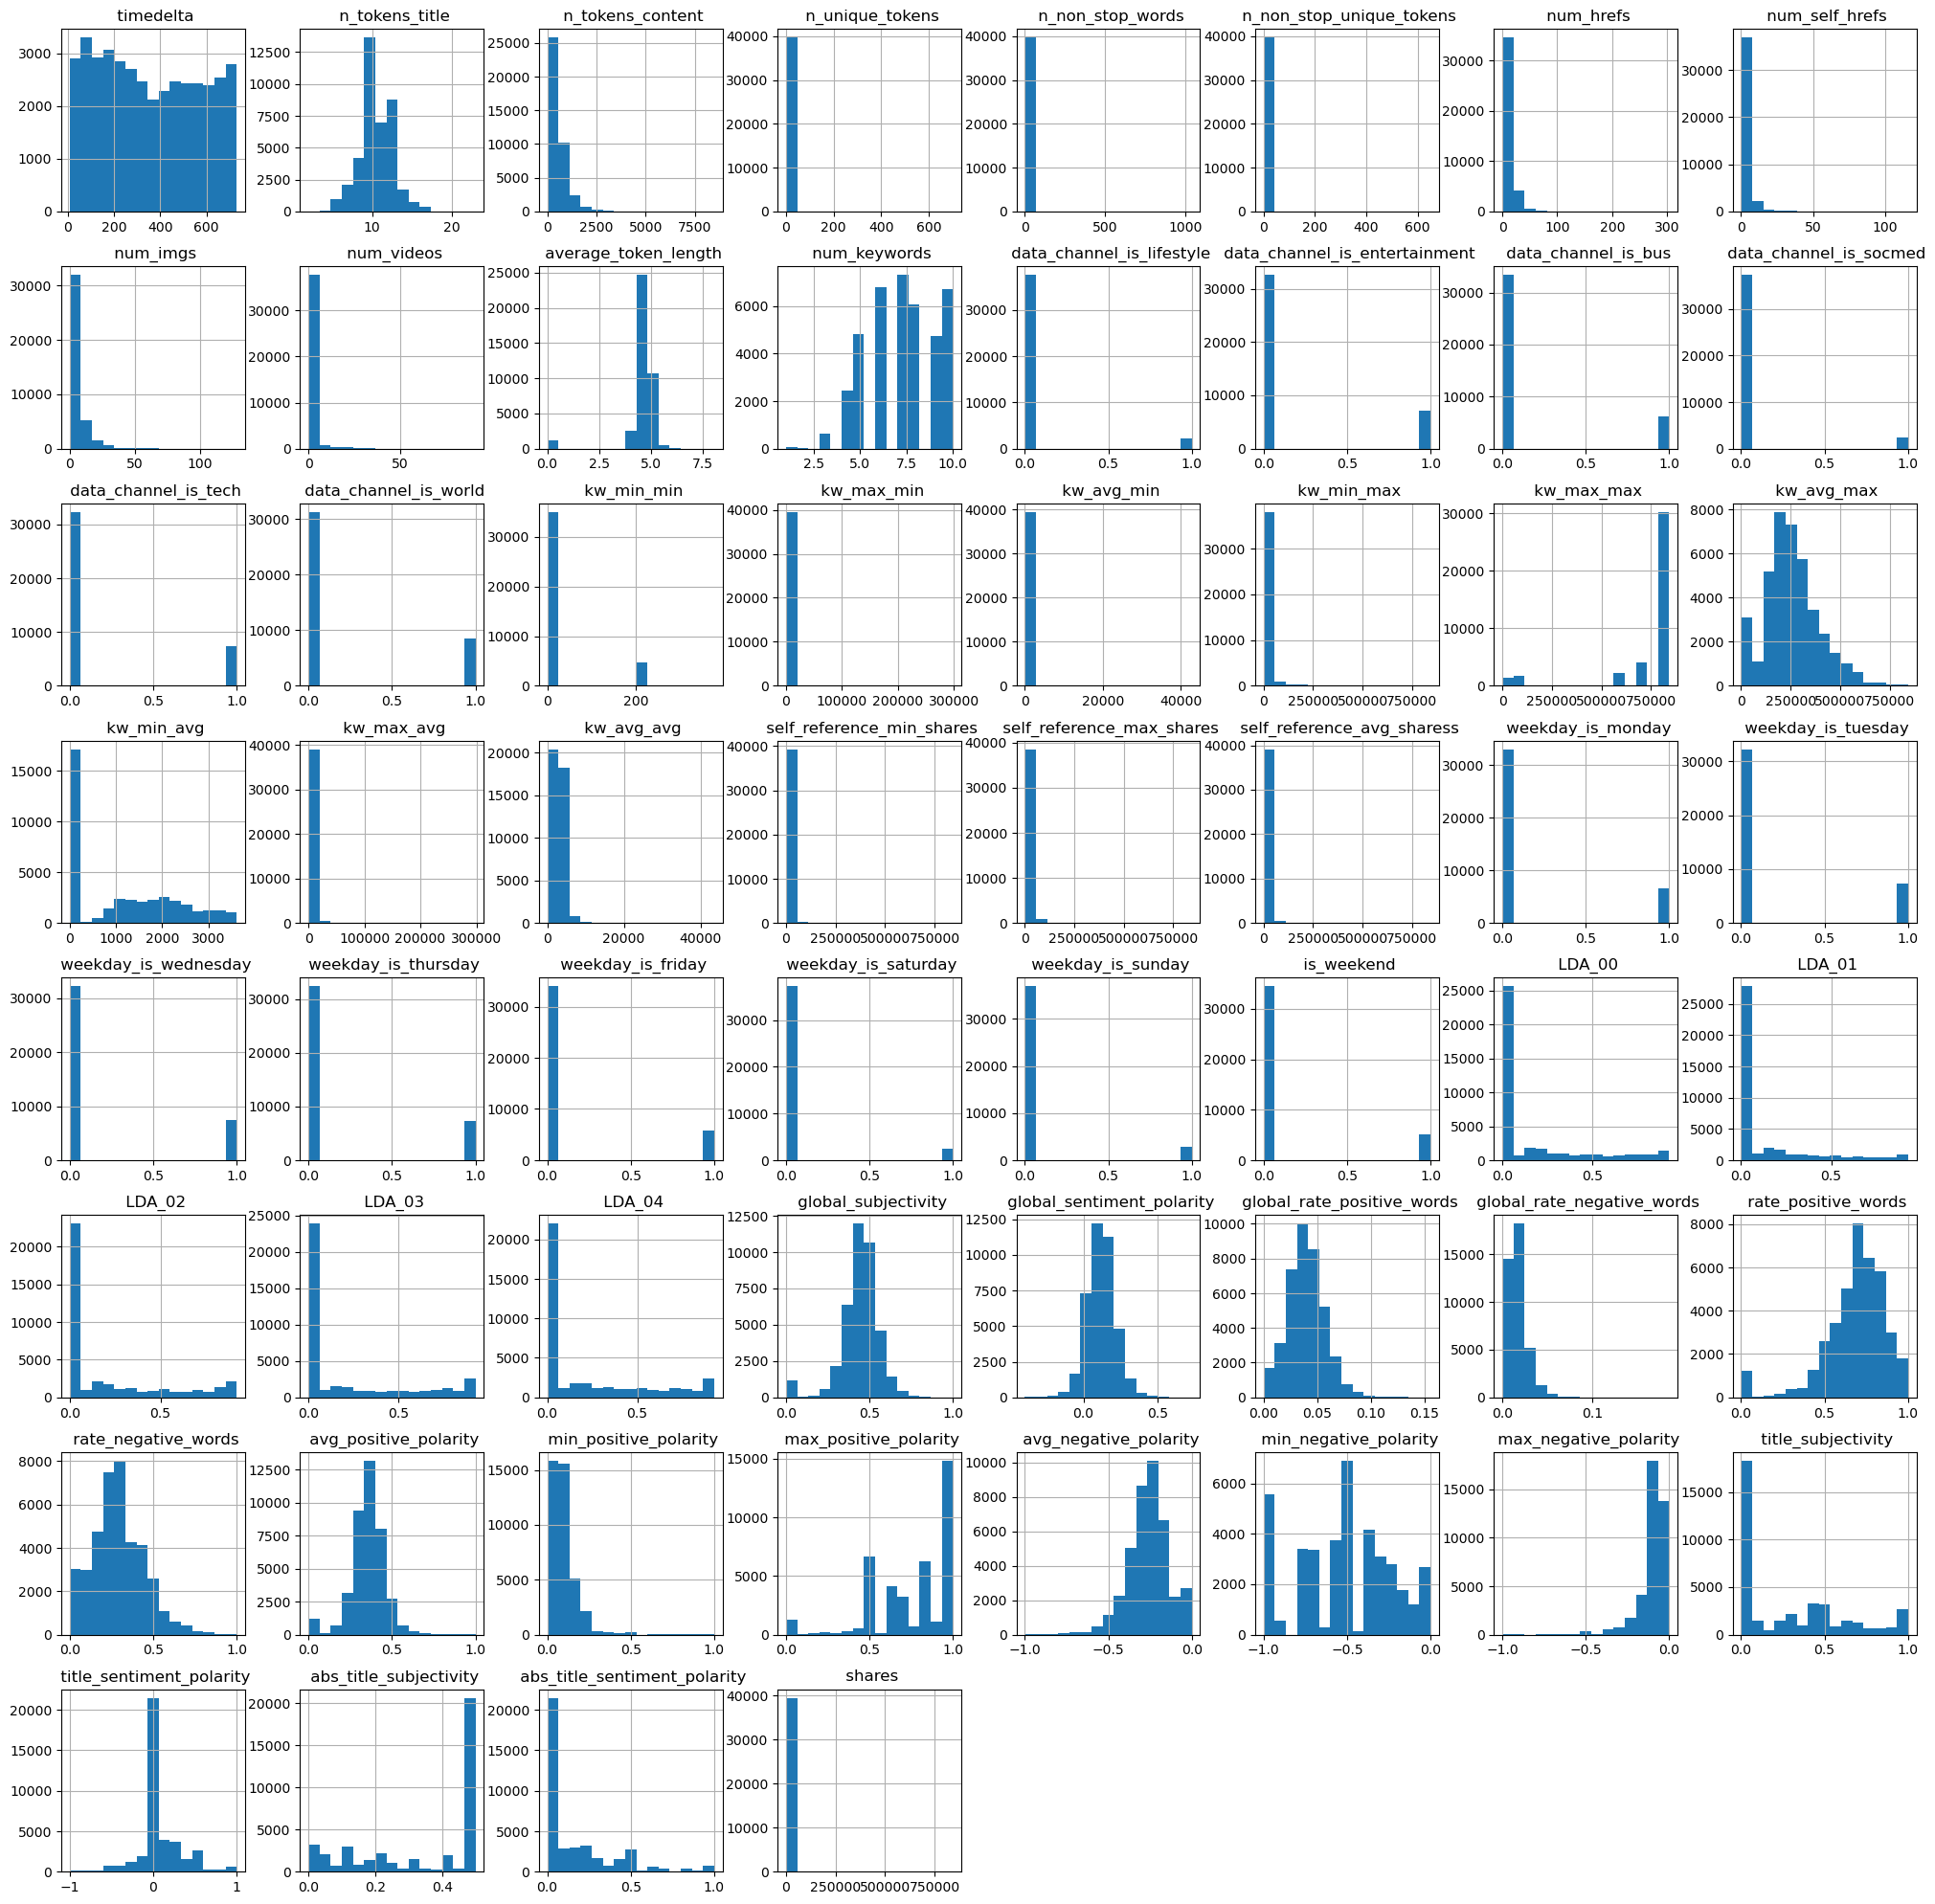

In [19]:
#exploring numerical features

numerical_features = news.select_dtypes(include=['float64', 'int64']).columns  
news[numerical_features].hist(bins=15, figsize=(25, 25))


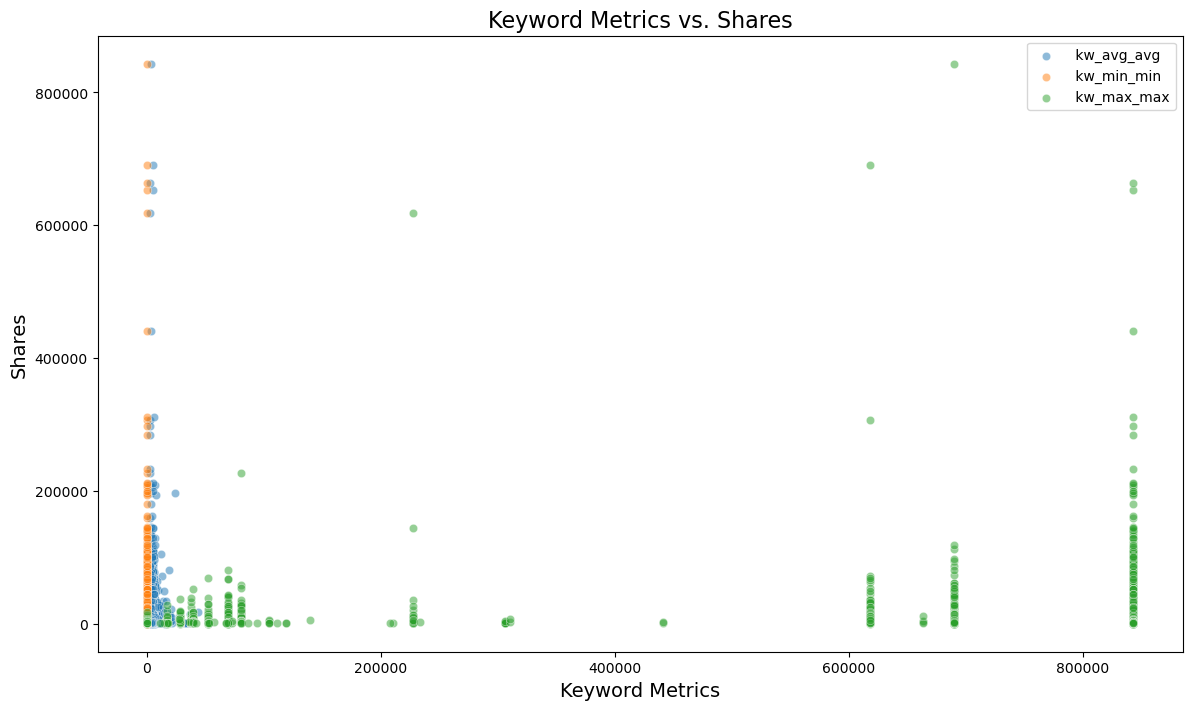

In [20]:
# Keyword Metrics and Shares
plt.figure(figsize=(14, 8))
keyword_features = [' kw_avg_avg', ' kw_min_min', ' kw_max_max']
for feature in keyword_features:
    sns.scatterplot(data=news, x=feature, y=' shares', alpha=0.5, label=feature)

plt.title('Keyword Metrics vs. Shares', fontsize=16)
plt.xlabel('Keyword Metrics', fontsize=14)
plt.ylabel('Shares', fontsize=14)
plt.legend()
plt.show()


While keyword metrics are relevant, the graph suggests they are not a sole determinant of an article's popularity. Other features (like visuals, sentiment, and timing) likely play critical roles.

The wide variance in shares for similar keyword metric values indicates high noise in the relationship. 

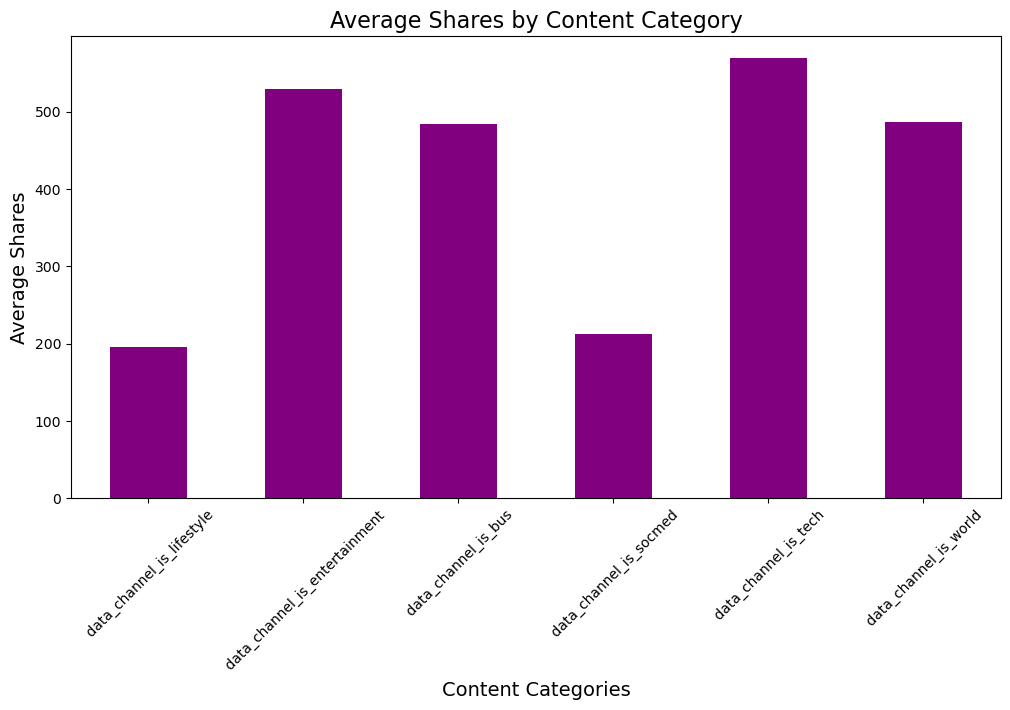

In [22]:
# Article Categories and Their Average Shares

categories = [' data_channel_is_lifestyle', ' data_channel_is_entertainment', 
              ' data_channel_is_bus', ' data_channel_is_socmed', 
              ' data_channel_is_tech', ' data_channel_is_world']

# Average shares by category
avg_shares_by_category = news[categories].mul(news[' shares'], axis=0).mean()

plt.figure(figsize=(12, 6))
avg_shares_by_category.plot(kind='bar', color='purple')
plt.title('Average Shares by Content Category', fontsize=16)
plt.xlabel('Content Categories', fontsize=14)
plt.ylabel('Average Shares', fontsize=14)
plt.xticks(rotation=45)
plt.show()


Visualizations of article categories and their average shares make for interesting trends on how content is engaged. The Tech channel is by far the most popular category, with the highest average shares, with the World and Entertainment channels being right behind. Articles get the least number of average shares on weekends when compared to weekends or perhaps signify low engagement of the audience when is analyzed when the days and average shares is visualized. 
A regplot is depicted which provide the ability to visualize the relationship between the number of shares and sentiment features by creating scatterplots

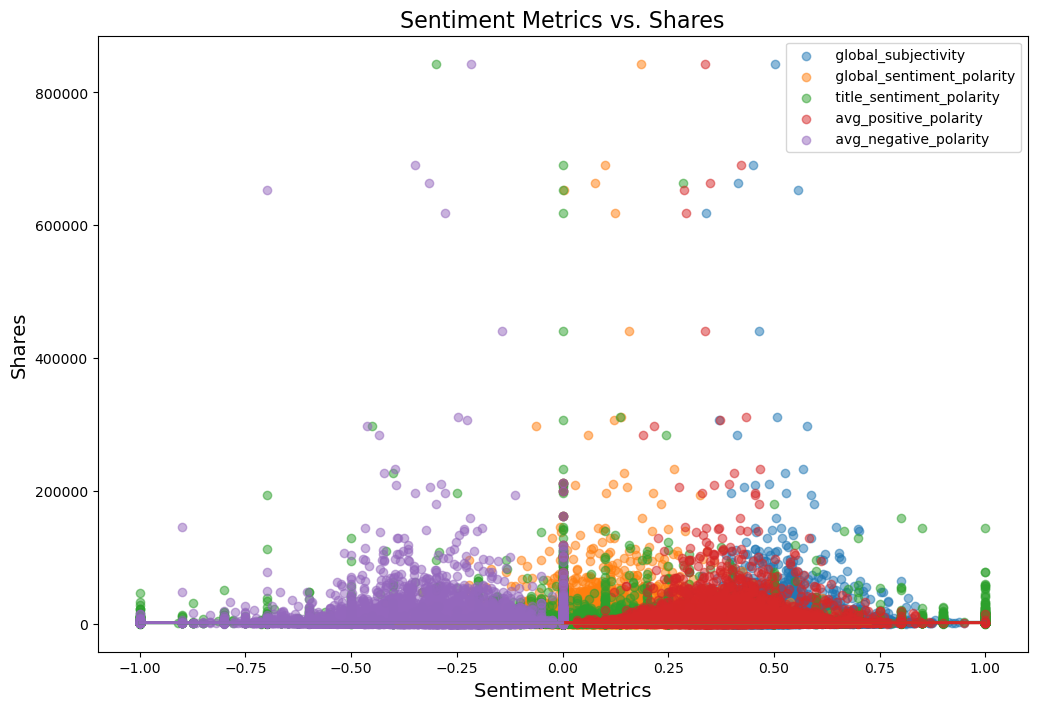

In [24]:
sentiment_features = [' global_subjectivity', ' global_sentiment_polarity', 
                      ' title_sentiment_polarity', ' avg_positive_polarity', 
                      ' avg_negative_polarity']

plt.figure(figsize=(12, 8))

# Plot each sentiment feature against shares
for feature in sentiment_features:
    sns.regplot(data=news, x=feature, y=' shares', lowess=True, label=feature, scatter_kws={'alpha':0.5})

plt.title('Sentiment Metrics vs. Shares', fontsize=16)
plt.xlabel('Sentiment Metrics', fontsize=14)
plt.ylabel('Shares', fontsize=14)
plt.legend()
plt.show()


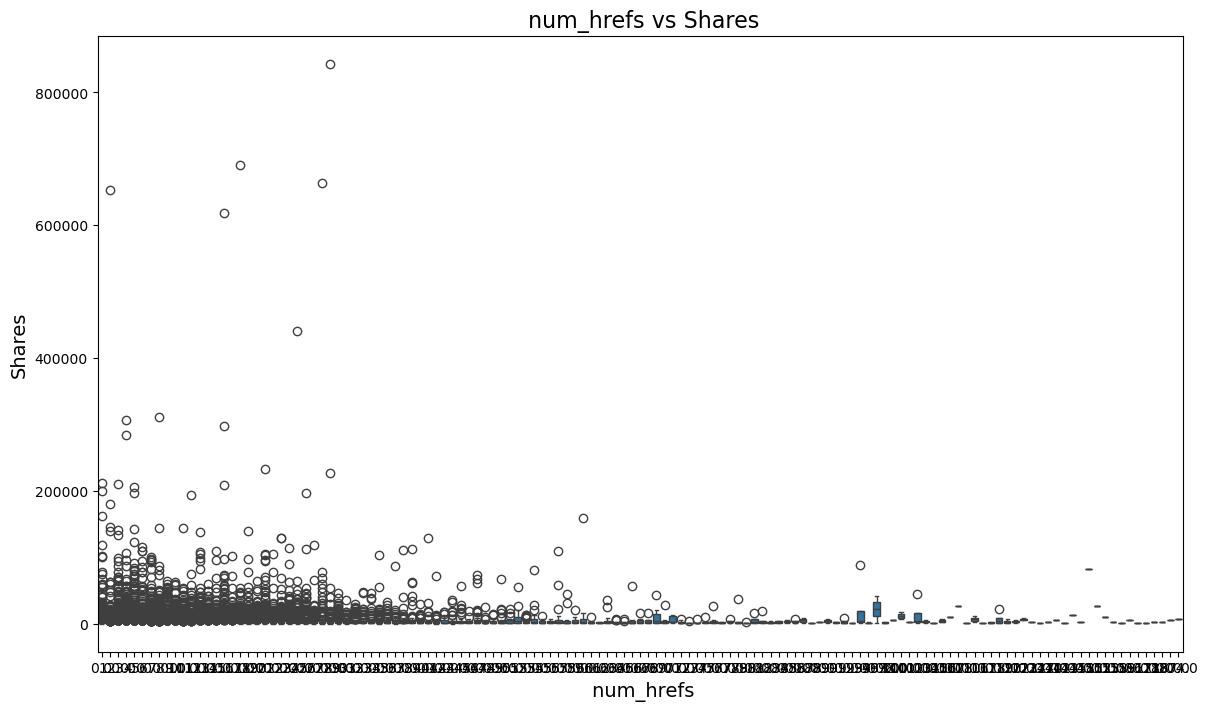

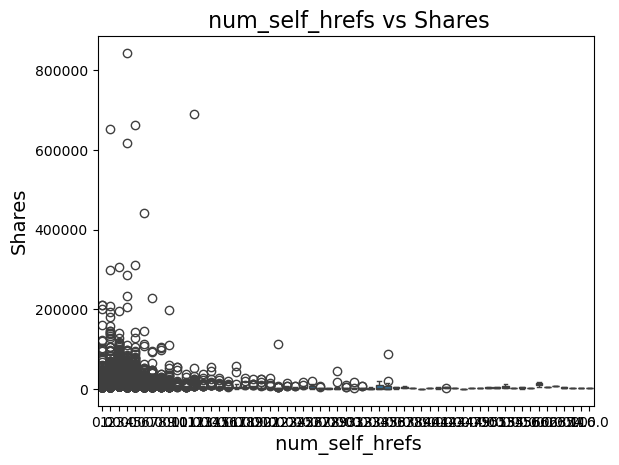

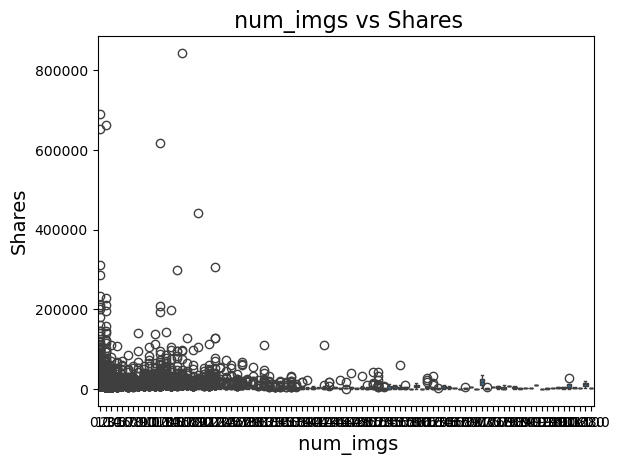

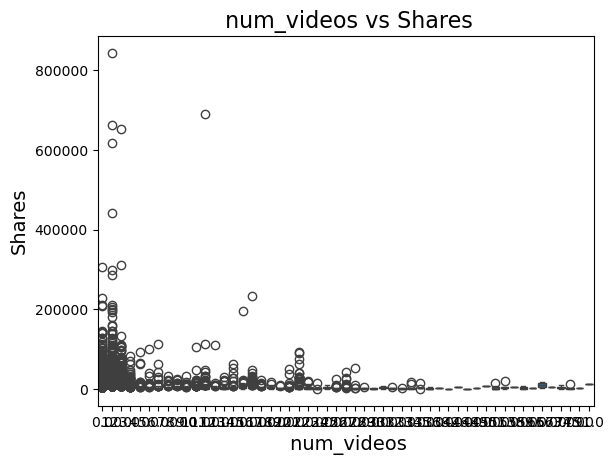

In [25]:
 # Engagement Features

engagement_features = [' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos']

# Plot scatter plots for engagement features
plt.figure(figsize=(14, 8))
for feature in engagement_features:
    sns.boxplot(data=news, x=feature, y=' shares')
    plt.title(f'{feature} vs Shares', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Shares', fontsize=14)
    plt.show()


majority of the content including media engagement i.e; links, images, videos have a share count between 0-20000, meanwhile a minority have the share count exceeding the range

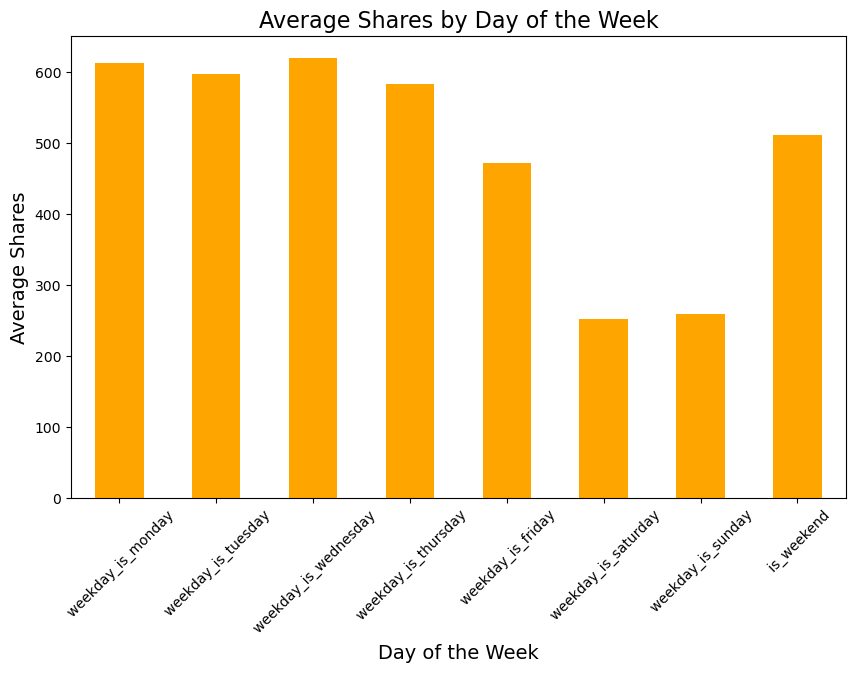

In [27]:
# Weekly Trends
weekly_trends = [' weekday_is_monday', ' weekday_is_tuesday', 
                 ' weekday_is_wednesday', ' weekday_is_thursday', 
                 ' weekday_is_friday', ' weekday_is_saturday', 
                 ' weekday_is_sunday', ' is_weekend']

# Average shares by weekday/weekend
avg_shares_by_day = news[weekly_trends].mul(news[' shares'], axis=0).mean()

plt.figure(figsize=(10, 6))
avg_shares_by_day.plot(kind='bar', color='orange')
plt.title('Average Shares by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Shares', fontsize=14)
plt.xticks(rotation=45)
plt.show()


most of the news article sharing appears to happen often during week days rather than during weekends.

## Data prepration

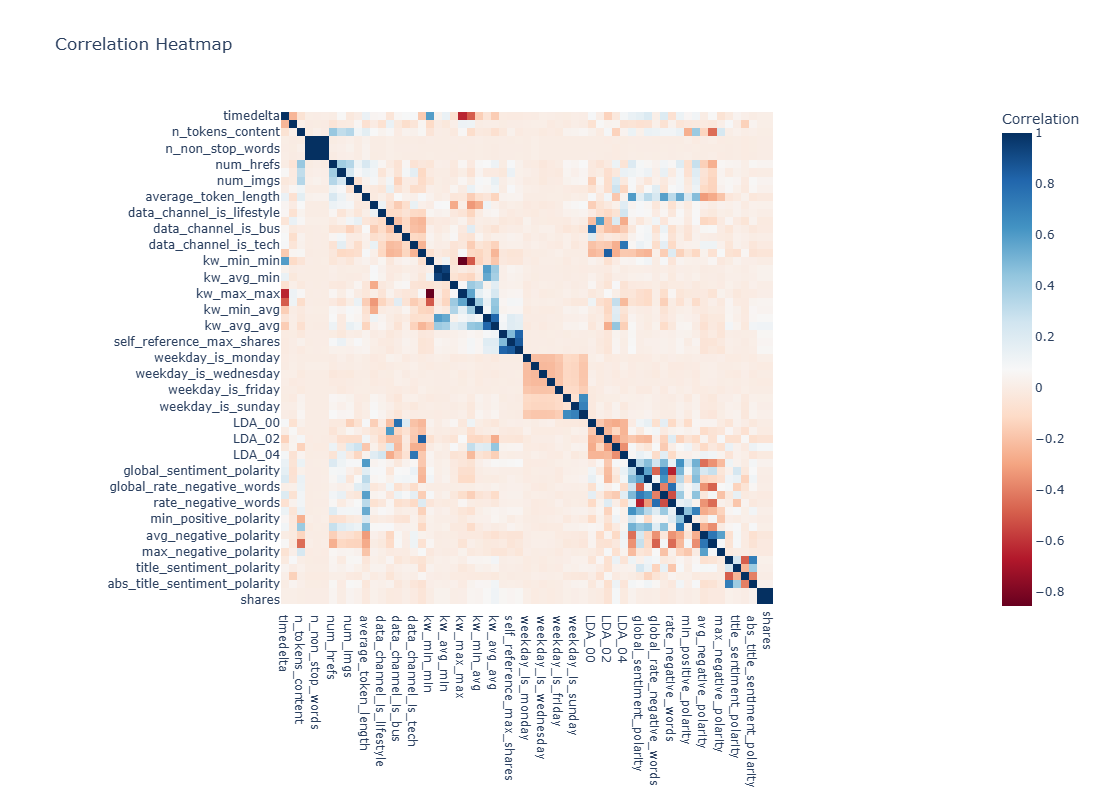

In [30]:
# Computing the correlation heatmap
news['shares'] = pd.to_numeric(news[' shares'], errors='coerce') 
# Since ' shares' column is of integer type, it is excluded by pandas while computing correlation matrix. therefore converting it to numeric type can help with this error

# Calculate the correlation matrix
corr_matrix = news.corr()

# Plotting
fig = px.imshow(corr_matrix,
                labels=dict(color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu',  # Color scale for better visualization
                title="Correlation Heatmap")

fig.update_layout(width=800, height=800)
fig.show()

In [31]:
# Extract correlations with 'shares' and sort by importance
target_corr = corr_matrix['shares'].drop('shares').sort_values(key=abs, ascending=False)

# Display the most strongly correlated features
print(target_corr)

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
LDA_02                          -0.059163
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
data_channel_is_world           -0.049497
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
avg_negative_polarity           -0.032029
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
average_token_length            -0.022007
title_subjectivity               0.021967
num_keywords                     0.021818
max_negative_polarity           -0.019300
min_negative_polarity           -0

In [32]:
# Drop Redundant or Low-Variance Features

# If any feature has very low variance across rows, it likely contributes little to prediction and could be dropped.
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
low_variance_columns = [column for column in news.columns if news[column].var() < 0.01]
news = news.drop(low_variance_columns, axis=1)

# Identify pairs of highly correlated features and keep only one from each pair.
corr_matrix = news.corr()
threshold = 0.9  # High correlation threshold
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

news = news.drop(labels=correlated_features, axis=1)


improves the dataset by:

Reducing Dimensionality:
Eliminates unnecessary features, speeding up training and reducing computational cost.
Preventing Overfitting:
Removes redundant and low-information features, reducing noise and the risk of overfitting.
Improving Model Interpretability:
Keeps only the most meaningful features, making the model's predictions easier to interpret.

In [34]:
# Outlier and skewness detection in each columns of this dataset

# Set the threshold for skewness (a common threshold is |skewness| > 1 for strong skew)
skew_threshold = 1

# Identify numeric columns
news_cols = news.columns.tolist()

# Declaring a Dictionary to store outlier and skewness info
outliers_info = {}
skewed_cols = []

# Detect outliers and skewness
for col in news_cols:
    # Calculating the skewness
    col_skewness = skew(news[col])
    
    # Checking if the column is skewed
    if abs(col_skewness) > skew_threshold:
        skewed_cols.append(col)
        
    # Calculating IQR
    Q1 = news[col].quantile(0.25)
    Q3 = news[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Counting outliers
    outliers = ((news[col] < lower_bound) | (news[col] > upper_bound)).sum()
    
    # Storing information in dictionary
    outliers_info[col] = {'skewness': col_skewness, 'outliers_count': outliers}

print(pd.DataFrame(outliers_info).T)

# Handling outliers by capping (clipping) values
for col in news_cols:
    Q1 = news[col].quantile(0.25)
    Q3 = news[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clipping values to the lower and upper bounds
    news[col] = np.clip(news[col], lower_bound, upper_bound)

# Output the skewed columns
print("\n Columns with high skewness (|skew| > 1):", skewed_cols)


                                 skewness  outliers_count
timedelta                        0.120500             0.0
n_tokens_title                   0.165314           156.0
n_tokens_content                 2.945310          1933.0
n_unique_tokens                198.647599          1604.0
num_hrefs                        4.013343          2169.0
num_self_hrefs                   5.172555          2090.0
num_imgs                         3.946447          7703.0
num_videos                       7.019267          2946.0
average_token_length            -4.575838          1681.0
num_keywords                    -0.147246            51.0
data_channel_is_lifestyle        3.992868          2099.0
data_channel_is_entertainment    1.683521          7057.0
data_channel_is_bus              1.876799          6258.0
data_channel_is_socmed           3.758737          2323.0
data_channel_is_tech             1.619914          7346.0
data_channel_is_world            1.405116          8427.0
kw_min_min    

## Feature engineering

In [36]:
# Aggregating features logically

# Mon to fridays is combined as weekdays and sat and sun is combined as weekends considering, it would create the same impact on target column
news['total_weekdays'] = news[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', 
                               ' weekday_is_thursday', ' weekday_is_friday']].sum(axis=1)
news['is_weekend'] = news[[' weekday_is_saturday', ' weekday_is_sunday']].sum(axis=1)
news = news.drop([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', 
                  ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', 
                  ' weekday_is_sunday'], axis=1)

# hence the no:of columns is reduced from 7 to 2.

In [37]:
news.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs',
       ' num_videos', ' average_token_length', ' num_keywords',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min',
       ' kw_max_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' is_weekend', ' LDA_00', ' LDA_01',
       ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', ' abs_tit

In [38]:
# Combining related keyword features by taking average to combine them

keyword_columns = [' kw_min_min',' kw_max_min',' kw_min_max',' kw_max_max',' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg']
news['kw_min_max_avg'] = news[keyword_columns].mean(axis=1)
news = news.drop(keyword_columns, axis=1)



In [39]:
# Aggregating the LDA_00 to LDA_04 columns (which represent the likelihood of various topics), into a single summary score.

lda_columns = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']
news['lda_topic_avg'] = news[lda_columns].mean(axis=1)
news = news.drop(lda_columns, axis=1)


In [40]:
# Binarizing columns for sentiment analysis using a threshold to convert continous variables to categorical since these columns doesn't influence much on the target value.
news['is_positive_sentiment'] = news[' title_sentiment_polarity'] > 0
news['is_subjective'] = news[' title_subjectivity'] > 0.5
news = news.drop([' title_subjectivity', ' title_sentiment_polarity'], axis=1)


In [41]:
news.head()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0       731.0             12.0              219.0          0.663594   
1       731.0              9.0              255.0          0.604743   
2       731.0              9.0              211.0          0.575130   
3       731.0              9.0              531.0          0.503788   
4       731.0             13.0             1072.0          0.415646   

    num_hrefs   num_self_hrefs   num_imgs   num_videos   average_token_length  \
0         4.0              2.0        1.0          0.0               4.680365   
1         3.0              1.0        1.0          0.0               4.913725   
2         3.0              1.0        1.0          0.0               4.393365   
3         9.0              0.0        1.0          0.0               4.404896   
4        19.0              8.5        8.5          0.0               4.682836   

    num_keywords  ...   min_negative_polarity   abs_title_subjectivity  \
0            5.0  ...                  -0.600                 0.000000   
1            4.0  ...                  -0.125                 0.500000   
2            6.0  ...                  -0.800                 0.500000   
3            7.0  ...                  -0.600                 0.500000   
4            7.0  ...                  -0.500                 0.045455   

    abs_title_sentiment_polarity   shares  total_weekdays  is_weekend  \
0                       0.187500      593             0.0         0.0   
1                       0.000000      711             0.0         0.0   
2                       0.000000     1500             0.0         0.0   
3                       0.000000     1200             0.0         0.0   
4                       0.136364      505             0.0         0.0   

   kw_min_max_avg  lda_topic_avg  is_positive_sentiment  is_subjective  
0   105481.972133       0.192256                  False          False  
1   105481.972133       0.153013                  False          False  
2   105481.972133       0.200000                  False          False  
3   105481.972133       0.184052                  False          False  
4   105481.972133       0.200000                   True          False  

[5 rows x 36 columns]

In [42]:
news.shape

(39644, 36)

In [43]:
news['shares_log'] = np.log1p(news[' shares'])  # Log transformation
news.drop(columns=[' shares'])

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0           731.0             12.0              219.0          0.663594   
1           731.0              9.0              255.0          0.604743   
2           731.0              9.0              211.0          0.575130   
3           731.0              9.0              531.0          0.503788   
4           731.0             13.0             1072.0          0.415646   
...           ...              ...                ...               ...   
39639         8.0             11.0              346.0          0.529052   
39640         8.0             12.0              328.0          0.696296   
39641         8.0             10.0              442.0          0.516355   
39642         8.0              6.0              682.0          0.539493   
39643         8.0             10.0              157.0          0.701987   

        num_hrefs   num_self_hrefs   num_imgs   num_videos  \
0             4.0              2.0        1.0          0.0   
1             3.0              1.0        1.0          0.0   
2             3.0              1.0        1.0          0.0   
3             9.0              0.0        1.0          0.0   
4            19.0              8.5        8.5          0.0   
...           ...              ...        ...          ...   
39639         9.0              7.0        1.0          1.0   
39640         9.0              7.0        3.0          2.5   
39641        24.0              1.0        8.5          1.0   
39642        10.0              1.0        1.0          0.0   
39643         1.0              1.0        0.0          2.0   

        average_token_length   num_keywords  ...   min_negative_polarity  \
0                   4.680365            5.0  ...                  -0.600   
1                   4.913725            4.0  ...                  -0.125   
2                   4.393365            6.0  ...                  -0.800   
3                   4.404896            7.0  ...                  -0.600   
4                   4.682836            7.0  ...                  -0.500   
...                      ...            ...  ...                     ...   
39639               4.523121            8.0  ...                  -0.500   
39640               4.405488            7.0  ...                  -0.400   
39641               5.076923            8.0  ...                  -0.800   
39642               4.975073            5.0  ...                  -0.500   
39643               4.471338            4.0  ...                  -0.200   

        abs_title_subjectivity   abs_title_sentiment_polarity  total_weekdays  \
0                     0.000000                       0.187500             0.0   
1                     0.500000                       0.000000             0.0   
2                     0.500000                       0.000000             0.0   
3                     0.500000                       0.000000             0.0   
4                     0.045455                       0.136364             0.0   
...                        ...                            ...             ...   
39639                 0.400000                       0.000000             0.0   
39640                 0.200000                       0.625000             0.0   
39641                 0.045455                       0.136364             0.0   
39642                 0.500000                       0.000000             0.0   
39643                 0.166667                       0.250000             0.0   

       is_weekend  kw_min_max_avg  lda_topic_avg  is_positive_sentiment  \
0             0.0   105481.972133       0.192256                  False   
1             0.0   105481.972133       0.153013                  False   
2             0.0   105481.972133       0.200000                  False   
3             0.0   105481.972133       0.184052                  False   
4             0.0   105481.972133       0.200000                   True   
...           ...         

In [44]:
# Scaling the columns in the dataset to a specific range

scaler = StandardScaler()
news_scaled = scaler.fit_transform(news.drop(columns=['shares_log']))


In [45]:
# Dimensionality Reduction with Principal Component Analysis (PCA)

# Apply PCA, keeping 95% of variance
pca = PCA(n_components=0.95)
news_pca = pca.fit_transform(news_scaled)

# Creating a new DataFrame with PCA components 
news_pca_data = pd.DataFrame(news_pca, columns=[f'PC{i}' for i in range(1, news_pca.shape[1] + 1)])
news_pca_data['shares'] = news['shares_log'].reset_index(drop=True)

<!-- Splitting data into training and testing part -->

In [47]:
news_pca_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.991216  0.045709 -1.487298 -1.408770 -2.287052  0.713178 -0.302611   
1      3.258177 -0.628928 -0.255769 -2.503880 -0.900232  0.902234 -1.183904   
2     -0.613632 -0.564861 -0.881835 -3.283610 -2.535929 -0.291890  1.995303   
3      1.021484 -2.068268 -0.645820 -1.939535 -1.150831  1.116916  1.134950   
4     -2.491383  0.180340 -2.447939 -1.457242  2.554008  0.828159 -1.200835   
...         ...       ...       ...       ...       ...       ...       ...   
39639 -1.512520  1.715698  3.347817  0.571887  1.299655 -0.686330 -0.025623   
39640 -0.335574  2.087061 -1.563950  1.122793 -0.281126 -1.414369  0.760067   
39641 -0.836946 -1.154109 -0.770458  1.932036 -0.167202  0.440229 -1.338811   
39642  2.150719 -2.605683  1.345764  0.529878 -0.539378  0.640770 -1.547672   
39643  2.336061  2.248443 -0.394735  1.301320 -1.436465 -2.406027 -0.905217   

            PC8       PC9      PC10  ...      PC13      PC14      PC15  \
0      1.215271  0.675940 -0.390826  ... -1.024358 -1.365323 -0.422511   
1      1.112923 -0.804670  0.795809  ...  0.808883 -0.032856 -0.848454   
2      0.882022 -0.875701 -0.506501  ... -1.698917 -0.862941  0.022206   
3      1.042394 -0.644673 -0.165835  ... -0.430016  0.022453 -0.284864   
4      1.473246  1.601984  0.158324  ... -0.256479 -1.972190 -0.237621   
...         ...       ...       ...  ...       ...       ...       ...   
39639  0.411745  1.154818  0.021876  ... -0.678987  0.215751  0.332459   
39640 -0.315552  2.306162  0.913236  ... -0.007254 -0.480095  1.015909   
39641 -2.042009  0.518916 -0.712755  ... -0.549905  0.257829  1.904433   
39642 -1.190960 -1.150129  0.874048  ...  0.031314  1.152210  0.299146   
39643  1.639509 -0.367934  0.761007  ...  0.211851  0.847476  1.778851   

           PC16      PC17      PC18      PC19      PC20      PC21    shares  
0      0.994299  0.231588 -0.447626  0.151237  1.218370  0.911260  6.386879  
1      1.165607 -0.428581 -0.241998  0.225284 -0.094895  0.614654  6.568078  
2      0.330627  0.237787 -0.378660  0.419900 -0.308877  0.665501  7.313887  
3      0.507255  0.353538  0.608021  0.407968 -0.139502  0.599315  7.090910  
4      0.965436  0.049424 -0.739969  0.676332 -0.079980  0.190890  6.226537  
...         ...       ...       ...       ...       ...       ...       ...  
39639 -1.124974  0.106923 -0.388509 -0.584480  0.107771  0.065226  7.496097  
39640  0.102691 -0.681408 -0.821621 -1.497731 -1.217293  1.455185  7.550135  
39641  1.300405  0.427134 -0.491938 -0.213872 -0.312032  0.640607  7.550135  
39642 -0.654144 -0.080331 -0.826122 -0.320238 -0.290047  0.993283  7.003974  
39643  0.729242  0.068245 -1.128681 -0.760074 -0.672074  0.722751  7.170888  

[39644 rows x 22 columns]

In [48]:
# Display the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance per component: {explained_variance}")
print(f"Cumulative explained variance: {np.cumsum(explained_variance)}")


Explained variance per component: [0.14416749 0.09377755 0.09013764 0.08566212 0.07602569 0.05526571
 0.04454615 0.04300405 0.04058738 0.03655603 0.03393916 0.0315272
 0.03088835 0.02987247 0.02797759 0.02336571 0.01794585 0.01617888
 0.01452037 0.01357838 0.0126519 ]
Cumulative explained variance: [0.14416749 0.23794504 0.32808268 0.4137448  0.48977049 0.5450362
 0.58958234 0.63258639 0.67317378 0.7097298  0.74366897 0.77519617
 0.80608452 0.835957   0.86393459 0.8873003  0.90524614 0.92142502
 0.9359454  0.94952377 0.96217567]


## Splitting the dataset

In [50]:
x = news_pca_data.drop('shares', axis=1)
y = news_pca_data['shares']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)


## Hyperparameter Tuning

In [52]:
# Define models and their hyperparameters
# model_params = {
#     'rf': {
#         'model': RandomForestRegressor(random_state=42),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [None, 10, 20, 30],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4],
#         }
#     },
#     'knn': {
#         'model': KNeighborsRegressor(),
#         'params': {
#             'n_neighbors': [5, 10, 15, 20, 25],
#         }
#     },
#     'dt': {
#         'model': DecisionTreeRegressor(random_state=42),
#         'params': {
#             'max_depth': [3, 5, 7, 10],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4],
#         }
#     },
#     'adaboost': {
#         'model': AdaBoostRegressor(random_state=42),
#         'params': {
#             'n_estimators': [50, 100, 150],
#             'learning_rate': [0.01, 0.1, 0.5, 1.0],
#         }
#     },
#     'gbr': {
#         'model': GradientBoostingRegressor(random_state=42),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [3, 5, 7],
#             'learning_rate': [0.01, 0.1, 0.2],
#         }
#     },
#     'xgboost': {
#         'model': XGBRegressor(random_state=42),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [3, 5, 7],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'subsample': [0.6, 0.8, 1.0],
#         }
#     },
#     'linear': {
#         'model': LinearRegression(),
#         'params': {
#             'fit_intercept': [True, False],
#         }
#     }
# }

# # Loop through models and perform GridSearchCV
# for model_name, model_details in model_params.items():
#     print(f"Running GridSearchCV for {model_name}...")
#     grid_search = GridSearchCV(
#         estimator=model_details['model'],
#         param_grid=model_details['params'],
#         cv=3,
#         n_jobs=-1,
#         verbose=2
#     )
#     grid_search.fit(x_train, y_train)
    
#     print(f"Best parameters for {model_name}: {grid_search.best_params_}\n")


In [53]:
## Training the models using the best parameters obtained

In [54]:
lr = LinearRegression(fit_intercept= True)
lr.fit(x_train, y_train)
lr_test_score = lr.score(x_test, y_test)
lr_train_score = lr.score(x_train, y_train)

rf = RandomForestRegressor(random_state=12,max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200)
rf.fit(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
rf_train_score = rf.score(x_train, y_train)

dt= DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split= 10)
dt.fit(x_train, y_train)
dt_test_score = dt.score(x_test, y_test)
dt_train_score = dt.score(x_train, y_train)

knn= KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
knn_test_score = knn.score(x_test, y_test)
knn_train_score = knn.score(x_train, y_train)

ab = AdaBoostRegressor(learning_rate= 0.1, n_estimators= 100)
ab.fit(x_train, y_train)
ab_test_score = ab.score(x_test, y_test)
ab_train_score = ab.score(x_train, y_train)

gb = GradientBoostingRegressor(learning_rate= 0.2, max_depth= 5, n_estimators=200)
gb.fit(x_train, y_train)
gb_test_score = gb.score(x_test, y_test)
gb_train_score = gb.score(x_train, y_train)

xb = XGBRegressor(learning_rate= 0.2, max_depth=5, n_estimators=200, subsample= 0.8)
xb.fit(x_train, y_train)
xb_test_score = xb.score(x_test, y_test)
xb_train_score = xb.score(x_train, y_train)

In [55]:
pd.DataFrame({'Model':['Linear Regression', 'Random Forest', 'Decision Tree', 'KNN', 'AdaBoost', 'GradientBoosting', 'XGB'],
             'Training Score':[lr_train_score, rf_train_score, dt_train_score, knn_train_score, ab_train_score, gb_train_score, xb_train_score],
             'Testing Score':[lr_test_score, rf_test_score, dt_test_score, knn_test_score, ab_test_score, gb_test_score, xb_test_score]})

Model  Training Score  Testing Score
0  Linear Regression        0.876933       0.875258
1      Random Forest        0.965272       0.826400
2      Decision Tree        0.775976       0.647801
3                KNN        0.757153       0.705629
4           AdaBoost        0.525158       0.511683
5   GradientBoosting        0.966965       0.909061
6                XGB        0.963901       0.915983

## Evaluate the model

In [57]:
# 1. Linear Regression

lr_preds = lr.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
lr_mape = np.mean(np.abs((y_test - lr_preds) / y_test)) * 100
lr_rss = np.sum((y_test - lr_preds) ** 2)

print(f"Linear Regression Performance:")
print(f"R²: {lr_r2}")
print(f"MSE: {lr_mse}")
print(f"RMSE: {lr_rmse}")
print(f"MAE: {lr_mae}")
print(f"MAPE: {lr_mape}")
print(f"RSS: {lr_rss}")


Linear Regression Performance:
R²: 0.8752582968441786
MSE: 0.06857243682716209
RMSE: 0.26186339344620524
MAE: 0.193085500812787
MAPE: 2.7375626054454223
RSS: 543.7108516025683


In [58]:
# 2. Random Forest Regressor

rf_preds = rf.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
rf_mape = np.mean(np.abs((y_test - rf_preds) / y_test)) * 100
rf_rss = np.sum((y_test - rf_preds) ** 2)

print(f"Random Forest Performance:")
print(f"R²: {rf_r2}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"MAPE: {rf_mape}")
print(f"RSS: {rf_rss}")


Random Forest Performance:
R²: 0.8263996004547701
MSE: 0.0954308152752669
RMSE: 0.308918784270667
MAE: 0.2151823565940346
MAPE: 3.1075601617576267
RSS: 756.6709343175912


In [59]:
# 3. Decision Tree Regressor

dt_preds = dt.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)
dt_mape = np.mean(np.abs((y_test - dt_preds) / y_test)) * 100
dt_rss = np.sum((y_test - dt_preds) ** 2)

print(f"Decision Tree Performance:")
print(f"R²: {dt_r2}")
print(f"MSE: {dt_mse}")
print(f"RMSE: {dt_rmse}")
print(f"MAE: {dt_mae}")
print(f"MAPE: {dt_mape}")
print(f"RSS: {dt_rss}")


Decision Tree Performance:
R²: 0.6478009236705569
MSE: 0.19360926058558864
RMSE: 0.4400105232668744
MAE: 0.3165853204786544
MAPE: 4.507092248990126
RSS: 1535.1278271831322


In [60]:
# 4. K-Nearest Neighbors

knn_preds = knn.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_preds)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, knn_preds)
knn_r2 = r2_score(y_test, knn_preds)
knn_mape = np.mean(np.abs((y_test - knn_preds) / y_test)) * 100
knn_rss = np.sum((y_test - knn_preds) ** 2)

print(f"K-Nearest Neighbors Performance:")
print(f"R²: {knn_r2}")
print(f"MSE: {knn_mse}")
print(f"RMSE: {knn_rmse}")
print(f"MAE: {knn_mae}")
print(f"MAPE: {knn_mape}")
print(f"RSS: {knn_rss}")


K-Nearest Neighbors Performance:
R²: 0.7056286372784495
MSE: 0.1618204751360019
RMSE: 0.40226915757487786
MAE: 0.30775853249155954
MAPE: 4.340883027817893
RSS: 1283.074547353359


In [61]:
# AdaBoost Regressor

ab_preds = ab.predict(x_test)
ab_mse = mean_squared_error(y_test, ab_preds)
ab_rmse = np.sqrt(ab_mse)
ab_mae = mean_absolute_error(y_test, ab_preds)
ab_r2 = r2_score(y_test, ab_preds)
ab_mape = np.mean(np.abs((y_test - ab_preds) / y_test)) * 100
ab_rss = np.sum((y_test - ab_preds) ** 2)

print(f"AdaBoost Performance:")
print(f"R²: {ab_r2}")
print(f"MSE: {ab_mse}")
print(f"RMSE: {ab_rmse}")
print(f"MAE: {ab_mae}")
print(f"MAPE: {ab_mape}")
print(f"RSS: {ab_rss}")


AdaBoost Performance:
R²: 0.511683263801624
MSE: 0.2684352361517875
RMSE: 0.5181073596773043
MAE: 0.4056125722503065
MAPE: 5.55481006247691
RSS: 2128.422987447523


In [62]:
# 6. Gradient Boosting Regressor

gb_preds = gb.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_preds)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_r2 = r2_score(y_test, gb_preds)
gb_mape = np.mean(np.abs((y_test - gb_preds) / y_test)) * 100
gb_rss = np.sum((y_test - gb_preds) ** 2)

print(f"Gradient Boosting Performance:")
print(f"R²: {gb_r2}")
print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}")
print(f"MAPE: {gb_mape}")
print(f"RSS: {gb_rss}")


Gradient Boosting Performance:
R²: 0.9090614858991071
MSE: 0.04999030280635104
RMSE: 0.22358511311433737
MAE: 0.14536554450464928
MAPE: 2.1139613380723388
RSS: 396.3731109515574


In [63]:
# 7. XGBoost Regressor

xb_preds = xb.predict(x_test)
xb_mse = mean_squared_error(y_test, xb_preds)
xb_rmse = np.sqrt(xb_mse)
xb_mae = mean_absolute_error(y_test, xb_preds)
xb_r2 = r2_score(y_test, xb_preds)
xb_mape = np.mean(np.abs((y_test - xb_preds) / y_test)) * 100
xb_rss = np.sum((y_test - xb_preds) ** 2)

print(f"XGBoost Performance:")
print(f"R²: {xb_r2}")
print(f"MSE: {xb_mse}")
print(f"RMSE: {xb_rmse}")
print(f"MAE: {xb_mae}")
print(f"MAPE: {xb_mape}")
print(f"RSS: {xb_rss}")


XGBoost Performance:
R²: 0.9159831360628538
MSE: 0.04618536503024622
RMSE: 0.2149078058848636
MAE: 0.1424876313436709
MAPE: 2.0647785241154186
RSS: 366.2037593248223


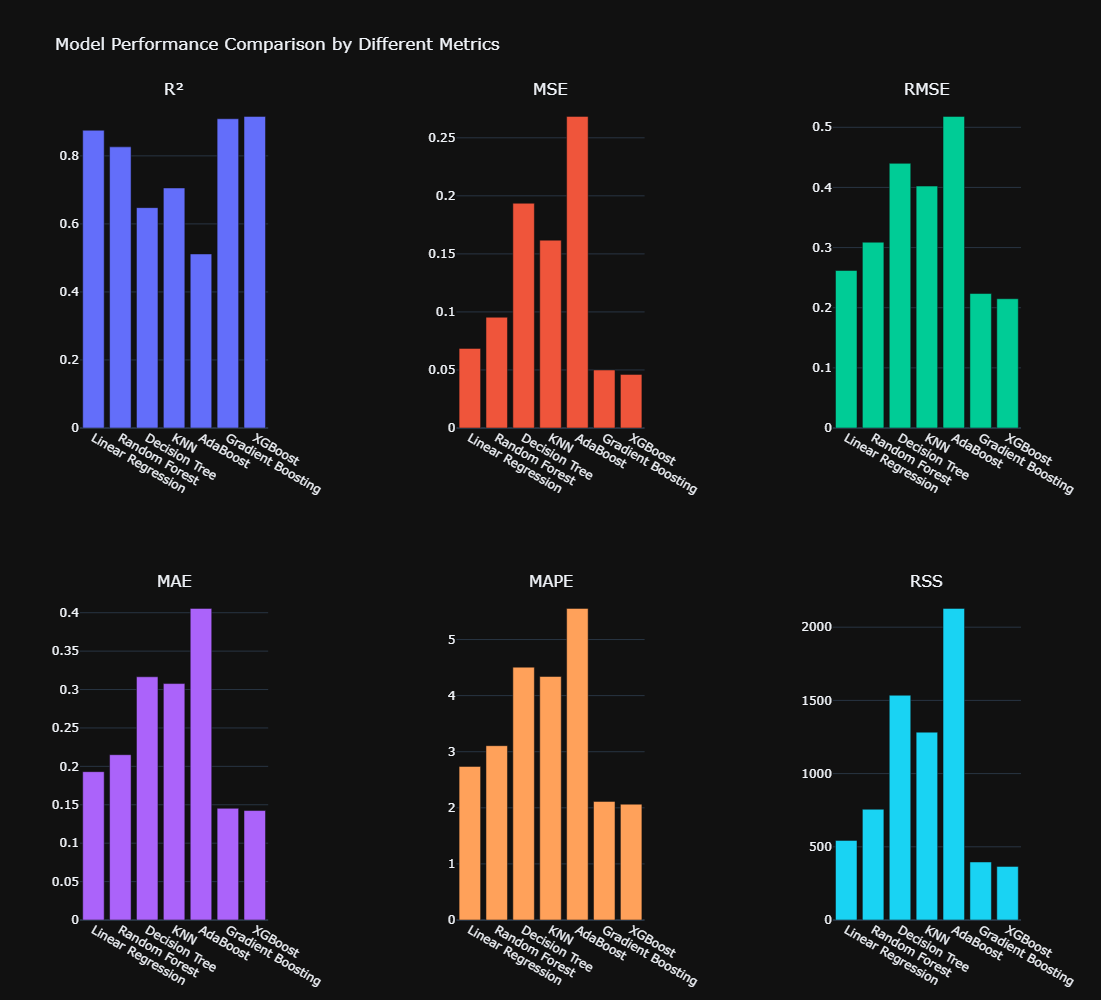

In [64]:
# Comparing the perfomance

# Define the performance metrics for each model
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 
          'KNN', 'AdaBoost', 'Gradient Boosting', 'XGBoost']

# Assuming these are the computed performance metrics for each model
metrics = ['R²', 'MSE', 'RMSE', 'MAE', 'MAPE', 'RSS']

# Example performance scores for each model (replace with your actual results)
data = {
    'R²': [lr_r2, rf_r2, dt_r2, knn_r2, ab_r2, gb_r2, xb_r2],
    'MSE': [lr_mse, rf_mse, dt_mse, knn_mse, ab_mse, gb_mse, xb_mse],
    'RMSE': [lr_rmse, rf_rmse, dt_rmse, knn_rmse, ab_rmse, gb_rmse, xb_rmse],
    'MAE': [lr_mae, rf_mae, dt_mae, knn_mae, ab_mae, gb_mae, xb_mae],
    'MAPE': [lr_mape, rf_mape, dt_mape, knn_mape, ab_mape, gb_mape, xb_mape],
    'RSS': [lr_rss, rf_rss, dt_rss, knn_rss, ab_rss, gb_rss, xb_rss]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df['Model'] = models

# Create subplots - 1 row for each metric
fig = make_subplots(
    rows=2, cols=3,  # Adjust rows and columns for all metrics
    subplot_titles=metrics, 
    vertical_spacing=0.2,
    horizontal_spacing=0.2,
    column_widths=[0.25, 0.25, 0.25],
    row_heights=[0.5, 0.5]
)

# Adding a bar chart for each metric
for i, metric in enumerate(metrics):
    row = i // 3 + 1  # Determine row position
    col = i % 3 + 1   # Determine column position
    fig.add_trace(
        go.Bar(
            x=df['Model'],
            y=df[metric],
            name=metric,
            hovertemplate='%{y}<extra></extra>',
        ),
        row=row, col=col
    )

# Update layout settings
fig.update_layout(
    title="Model Performance Comparison by Different Metrics",
    showlegend=False,
    height=1000,
    width=1000,
    template="plotly_dark",
)

# Show the plot
fig.show()
